In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import numpy as np

# 读取数据
df = pd.read_csv('ai_job_dataset.csv')

# 删除不相关字段
X = df.drop(columns=[
    'job_id', 'salary_currency', 'salary_usd',
    'posting_date', 'application_deadline', 'required_skills', 'company_name'
])
y = df['salary_usd']

# 识别分类字段
categorical_cols = X.select_dtypes(include='object').columns.tolist()

# 预处理器
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

# 建立 pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(objective='reg:squarederror', random_state=42))
])

# 参数设置
param_grid = {
    'regressor__n_estimators': [100],
    'regressor__max_depth': [4],
    'regressor__learning_rate': [0.1]
}

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Grid Search
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# 预测与评估
y_pred = grid_search.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R2 Score:", r2)
print("Best Params:", grid_search.best_params_)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
RMSE: 20437.6390025854
R2 Score: 0.8854742050170898
Best Params: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 4, 'regressor__n_estimators': 100}


In [ ]:
# 构建 pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(objective='reg:squarederror', random_state=42))
])

# 设置参数搜索范围（简单设置）
param_grid = {
    'regressor__n_estimators': [100],
    'regressor__max_depth': [4],
    'regressor__learning_rate': [0.1]
}

# 划分训练测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用 GridSearchCV 搜索最优模型
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# 预测结果
y_pred = grid_search.predict(X_test)

# 打印评估结果
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))


Fitting 3 folds for each of 1 candidates, totalling 3 fits
RMSE: 20437.6390025854
R² Score: 0.8854742050170898


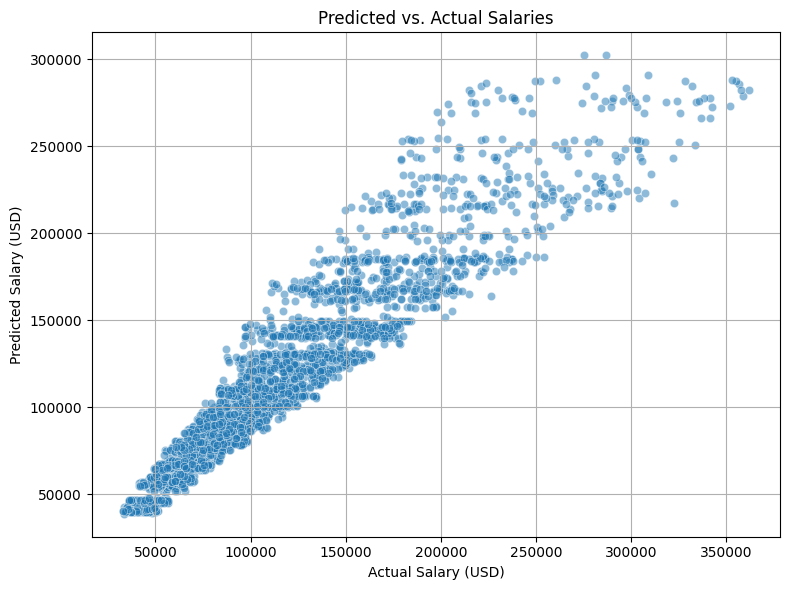

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Salary (USD)")
plt.ylabel("Predicted Salary (USD)")
plt.title("Predicted vs. Actual Salaries")
plt.grid(True)
plt.tight_layout()
plt.show()


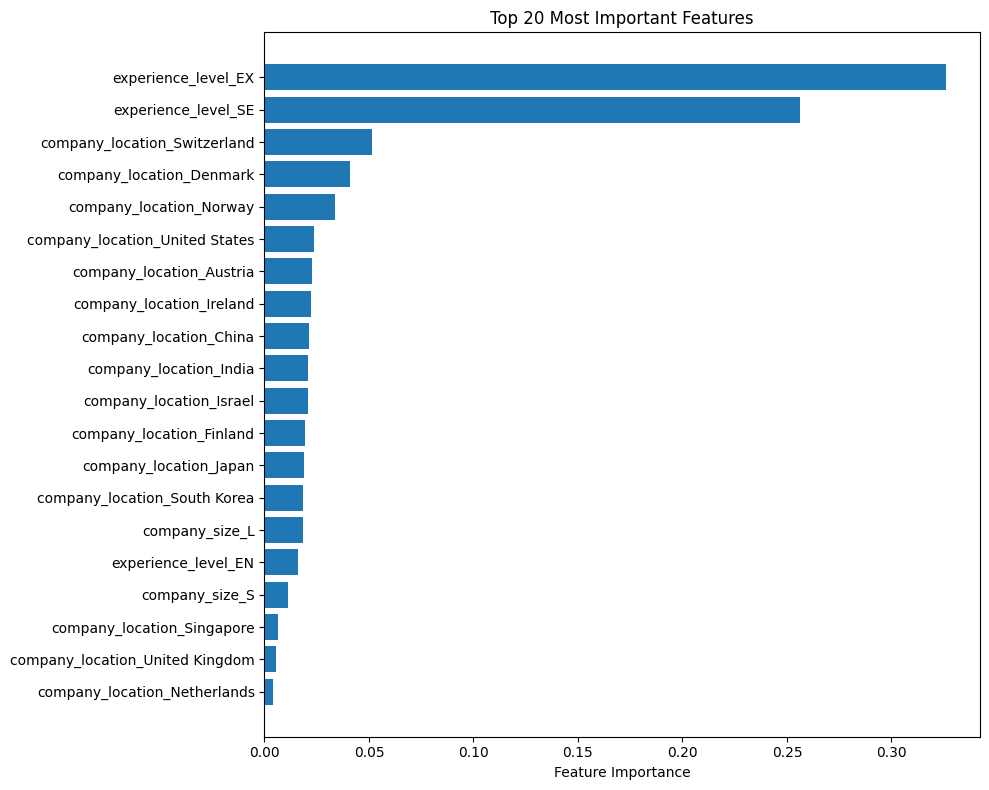

In [ ]:
# 提取特征名
onehot = grid_search.best_estimator_.named_steps['preprocessor'].named_transformers_['cat']
encoded_feature_names = onehot.get_feature_names_out(categorical_cols)
remaining = [col for col in X.columns if col not in categorical_cols]
feature_names = list(encoded_feature_names) + remaining

# 提取重要性值
importances = grid_search.best_estimator_.named_steps['regressor'].feature_importances_
indices = np.argsort(importances)[-20:]

# 绘图
plt.figure(figsize=(10, 8))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Feature Importance")
plt.title("Top 20 Most Important Features")
plt.tight_layout()
plt.show()


In [4]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
import pandas as pd
import numpy as np

# 读取数据（你已上传）
df = pd.read_csv('ai_job_dataset.csv')

# 准备特征
X = df.drop(columns=['job_id', 'salary_currency', 'salary_usd', 'posting_date', 'application_deadline', 'required_skills', 'company_name'])
y = df['salary_usd']
categorical_cols = X.select_dtypes(include='object').columns.tolist()

# 创建预处理器 + pipeline
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)],
    remainder='passthrough'
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(objective='reg:squarederror', random_state=42))
])

param_grid = {
    'regressor__n_estimators': [100],
    'regressor__max_depth': [4],
    'regressor__learning_rate': [0.1]
}

# 划分数据
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['job_title',
                                                                          'experience_level',
                                                                          'employment_type',
                                                                          'company_location',
                                                                          'company_size',
                                                                          'employee_residence',
                                                                          'education_required',
                                                                          'industry'])])),
                                       ('regressor',
                                        XGBRegressor(base_score=None,
                                                     boos...
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'regressor__learning_rate': [0.1],
                         'regressor__max_depth': [4],
                         'regressor__n_estimators': [100]},
             scoring='neg_mean_squared_error', verbose=1)

In [6]:
import joblib
joblib.dump(grid_search.best_estimator_, 'xgboost_salary_model.pkl')


['xgboost_salary_model.pkl']

In [4]:
import pandas as pd

df = pd.read_csv('ai_job_dataset.csv')
# 显示数据结构
print(df.info())

# 显示列名
print(df.columns.tolist())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null